In [3]:
import pydicom 
import os
from scipy import *
import numpy
import matplotlib.pyplot as plt
from tkinter import Tk
from tkinter.filedialog import askopenfilename


The name of the DICOM file selected is: imagen_1.dcm


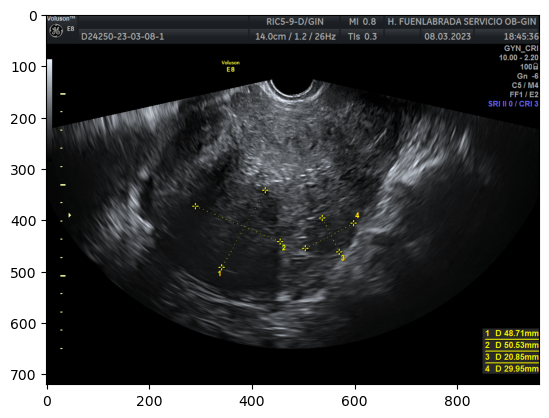

In [4]:

# Create a Tkinter instance
root = Tk()
root.withdraw() 
# Create a window to select a DICOM file
file_path = askopenfilename(title="Select a DICOM file", filetypes=[("DICOM files", "*.dcm")])

#Read DICOM file withpydicom
ds = pydicom.dcmread(file_path)

# Get the name of the DICOM file
file_name = os.path.basename(file_path)

print("The name of the DICOM file selected is:", file_name)

# Visualize the selected image 
image = ds.pixel_array
plt.imshow(image, cmap='gray')
plt.show()


In [ ]:
def anonymize_dicom(in_path, out_path='anonymized.dcm', patient_name='Anonymous', patient_id='*****', patient_sex='unknown', patient_age='**'):
    dicom = pydicom.dcmread(in_path)
    dicom.PatientName = patient_name
    dicom.PatientID = patient_id
    dicom.PatientBirthDate = patient_age
    dicom.PatientSex = patient_sex
    dicom.save_as(out_path)
    if dicom.Modality == 'US' and dicom.Manufacturer == 'GE Healthcare Austria GmbH & Co OG':
        imageR = dicom.pixel_array[:,:,0]
        imageRC = imageR[:,1] 
        for i in range(1, len(imageRC)):
            if imageRC[i-1] > 0 and imageRC[i] == 0:
                print(f"Change detected in index {i}: from {imageRC[i-1]} to {imageRC[i]}")
                break
        new_image = image[i:,:]
        dicom.PixelData = new_image.tobytes()
        dicom.save_as(out_path)



In [5]:
anonymize_dicom(file_path,out_path =file_name+'anonymized.dcm')
    

Change detected in index 58: from 26 to 0


C:\Users\6941487209323\Downloads\anaconda\lib\site-packages\pydicom\valuerep.py:290: UserWarning: Invalid value for VR DA: '**'.
  warnings.warn(msg)
C:\Users\6941487209323\Downloads\anaconda\lib\site-packages\pydicom\valuerep.py:290: UserWarning: Invalid value for VR CS: 'unknown'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
